In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

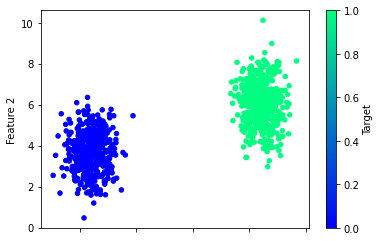

In [6]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

#Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"]=y


# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [9]:
df.head()

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1


In [11]:
#Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

#Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [13]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [14]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [15]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [16]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Complie the Sequential model together and customizae metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 683us/step - loss: 0.6652 - accuracy: 0.6882
Epoch 2/100
24/24 [==============================] - 0s 650us/step - loss: 0.6565 - accuracy: 0.7539
Epoch 3/100
24/24 [==============================] - 0s 645us/step - loss: 0.6565 - accuracy: 0.7550
Epoch 4/100
24/24 [==============================] - 0s 614us/step - loss: 0.6442 - accuracy: 0.7881
Epoch 5/100
24/24 [==============================] - 0s 635us/step - loss: 0.6337 - accuracy: 0.8164
Epoch 6/100
24/24 [==============================] - 0s 667us/step - loss: 0.6224 - accuracy: 0.8469
Epoch 7/100
24/24 [==============================] - 0s 722us/step - loss: 0.6120 - accuracy: 0.8724
Epoch 8/100
24/24 [==============================] - 0s 695us/step - loss: 0.6026 - accuracy: 0.9074
Epoch 9/100
24/24 [==============================] - 0s 653us/step - loss: 0.5896 - accuracy: 0.9301
Epoch 10/100
24/24 [==============================] - 0s 686us/step - loss: 0.5746 - accura

24/24 [==============================] - 0s 601us/step - loss: 0.0961 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 592us/step - loss: 0.0937 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 626us/step - loss: 0.0902 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 669us/step - loss: 0.0850 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 607us/step - loss: 0.0872 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 619us/step - loss: 0.0885 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 635us/step - loss: 0.0861 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 644us/step - loss: 0.0836 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 628us/step - loss: 0.0795 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 613us/step - loss: 0.0856 - accuracy: 

         loss  accuracy
1    0.665290  0.716000
2    0.658896  0.757333
3    0.651621  0.778667
4    0.643337  0.801333
5    0.633580  0.830667
..        ...       ...
96   0.073960  1.000000
97   0.072813  1.000000
98   0.071710  1.000000
99   0.070613  1.000000
100  0.069544  1.000000

[100 rows x 2 columns]


<AxesSubplot:>

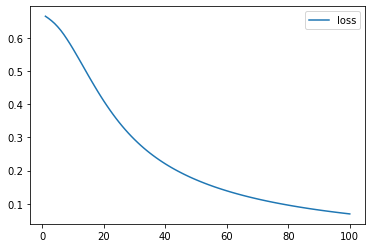

In [24]:
# Create a DF containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss'])+1))
print(history_df)
# Plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

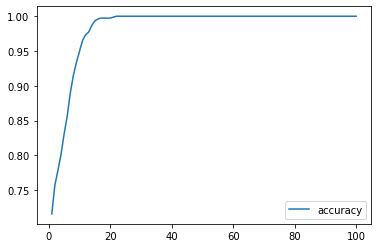

In [26]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0718 - accuracy: 1.0000
Loss: 0.0717955231666565, Accuracy: 1.0


In [31]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples = 10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype('int32')

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)